## Nanodegree Project 1 - Calculating budget for traveling Sicily
The project is based on Airbnb data for Sicily, retrieved from http://insideairbnb.com/. 
The target of the project is to explore relationship between rental fee, locations and accomodation characteristics of the airbnb offer. The project will analysis the forecasted cost for accomodation of an hypothetical 2 weeks travel in Sicily, considering variation in travelling preferences,  destinations and requested room characteristics (and assuming to stay in some Airbnb or Airbnb-like houses).  

## Step 1 - Pick a data set. Reading and basic understanding of available Data

In [1]:
import pandas as pd

In [2]:
cd ".\\Data"

C:\Users\Roberto\UdacityNanodegreeAirbnb\Data


Available data are grouped in a few files, namely:
- "listings_full.csv": descriptions of the different structures, including position, price, charcteristics, rating etc 
- "listings_short".csv: a subset of previous files limited to more commonly used columns
- "calendar.csv": basically price per date per accomodation. Information are correlated listing through a dedicated listing_id field
- "neighbourhoods.csv": Basically include the list of towns/village considered 
- "neighbourhoods.geojson": geojson geographical info for locations in neighbourhoods 
- "reviews_short.csv": each rows corresponds to a stay review and provides a reference to the evaluated structure and a date for the review 
- "reviews_full.csv": for each review listed in the previous file, adds reviewer id and the text provided as a review 

Following commands will explore the content of different dataset, starting from basic files and then moving to more complex ones 

#### Listings

In [3]:
listings=pd.read_csv('listings_short.csv')


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49659 entries, 0 to 49658
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              49659 non-null  int64  
 1   name                            49654 non-null  object 
 2   host_id                         49659 non-null  int64  
 3   host_name                       47320 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   49659 non-null  object 
 6   latitude                        49659 non-null  float64
 7   longitude                       49659 non-null  float64
 8   room_type                       49659 non-null  object 
 9   price                           49659 non-null  int64  
 10  minimum_nights                  49659 non-null  int64  
 11  number_of_reviews               49659 non-null  int64  
 12  last_review                     

In [5]:
listings.nunique()

id                                49659
name                              47587
host_id                           27413
host_name                          4204
neighbourhood_group                   0
neighbourhood                       369
latitude                          36218
longitude                         38184
room_type                             4
price                               729
minimum_nights                       49
number_of_reviews                   324
last_review                        1873
reviews_per_month                   509
calculated_host_listings_count       58
availability_365                    366
dtype: int64

In [6]:
listings.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.965900e+04,4.965900e+04,0.0,49659.000000,49659.000000,49659.000000,49659.000000,49659.000000,31597.000000,49659.000000,49659.000000
mean,2.495376e+07,1.185594e+08,NaN,37.619581,14.174445,93.213093,3.058277,11.583359,0.432392,8.986709,259.985884
std,1.407835e+07,1.087286e+08,NaN,0.542291,1.032261,242.796749,8.777910,29.684682,0.669746,27.377200,117.760813
min,7.011000e+03,1.688800e+04,NaN,35.494150,11.927540,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.352509e+07,2.224665e+07,NaN,37.079810,13.314330,45.000000,1.000000,0.000000,0.070000,1.000000,179.000000
50%,2.496907e+07,8.353864e+07,NaN,37.762520,14.605340,60.000000,2.000000,2.000000,0.180000,2.000000,311.000000
75%,3.669773e+07,1.946803e+08,NaN,38.066945,15.110270,95.000000,3.000000,9.000000,0.480000,4.000000,364.000000
max,4.889389e+07,3.943143e+08,NaN,38.810190,15.651370,21000.000000,1000.000000,598.000000,10.860000,238.000000,365.000000


The listings dataset include almost 50k airbnb structures in the region (1 per row) and appears to be complete in most of its key fields (price, neighbourhood, room type, etc do not show NaN values at first glance). We only have a few missing info about the the host (name and id), while about 40% of structures appear to miss reviews.
We also note the presence of a structure id (that will be used to correlate info from different files) and of a field that include a date and must later be casted into datetime

In [7]:
listings[listings['neighbourhood']=='Favignana'].head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
264,319959,Beautiful Appartment in Favignana,1585324,Alice,NaN,Favignana,37.90972,12.34908,Entire home/apt,50,5,14,2019-08-28,0.13,7,335
365,440491,VACANZE SULL' ISOLA DI FAVIGNANA,2151311,Rosario,NaN,Favignana,37.92525,12.33097,Entire home/apt,50,7,58,2019-09-11,0.61,5,310
366,440565,The Butterfly Island,2151311,Rosario,NaN,Favignana,37.92502,12.32384,Entire home/apt,54,7,44,2020-08-07,0.46,5,327


array([[<AxesSubplot:title={'center':'number_of_reviews'}>]], dtype=object)

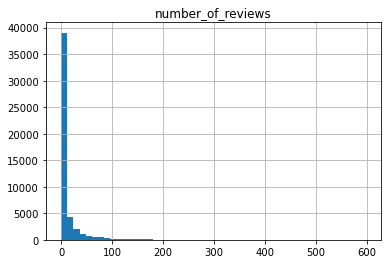

In [8]:
listings.hist(bins=50,column=['number_of_reviews'])

In [9]:
listings['number_of_reviews'].value_counts().head(5)

0    18062
1     6495
2     3552
3     2441
4     1875
Name: number_of_reviews, dtype: int64

In [10]:
listings['number_of_reviews'].sum()

575218

In [11]:
listings['room_type'].value_counts()

Entire home/apt    39792
Private room        9171
Hotel room           606
Shared room           90
Name: room_type, dtype: int64

<AxesSubplot:>

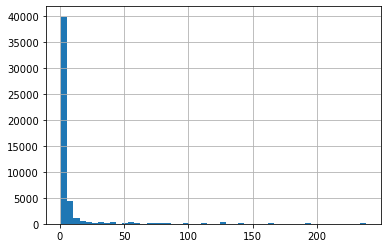

In [12]:
listings['calculated_host_listings_count'].hist( bins=50)

#### Calendar

In [13]:
calendar=pd.read_csv('calendar.csv')

In [14]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18125862 entries, 0 to 18125861
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 968.0+ MB


In [15]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,189107,2021-04-01,f,$110.00,$110.00,2.0,730.0
1,67134,2021-04-02,t,$55.00,$55.00,5.0,1125.0
2,67134,2021-04-03,t,$55.00,$55.00,5.0,1125.0
3,67134,2021-04-04,t,$55.00,$55.00,5.0,1125.0
4,67134,2021-04-05,t,$55.00,$55.00,5.0,1125.0


Each rows of the calendar dataframe represents main rental contractual conditions for a specific structure ("listing_id") in a specific date ("date"), showing cost per day, night number constraints and an "adjusted price" per day). 

Dates (to be casted to datetime) represents dates in the future at the time when web scraping happened.

Commands below show the calendar and listing information associated to a specific strcture (listing id= 67134)

In [16]:
calendar[calendar['listing_id']==67134].head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1,67134,2021-04-02,t,$55.00,$55.00,5.0,1125.0
2,67134,2021-04-03,t,$55.00,$55.00,5.0,1125.0
3,67134,2021-04-04,t,$55.00,$55.00,5.0,1125.0
4,67134,2021-04-05,t,$55.00,$55.00,5.0,1125.0
5,67134,2021-04-06,t,$55.00,$55.00,5.0,1125.0


In [17]:
listings[listings['id']==67134]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
28,67134,[Taormina ] apartment ground floor,330536,NaN,NaN,Acireale,37.65242,15.1936,Entire home/apt,55,5,9,2020-10-22,0.08,6,365


#### Reviews

Reviews dataframe only include two columns, the first pointing to a listing_id (structure identifier) and the second containing a date. Each row means that there is a review of the structure 'listing_id' done in the date 'date'

In [18]:
reviews=pd.read_csv('reviews_short.csv')

In [19]:
reviews.head(3)

,listing_id,date
0,7011,2009-08-26
1,7011,2010-07-15
2,7011,2010-09-23


In [20]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575218 entries, 0 to 575217
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  575218 non-null  int64 
 1   date        575218 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.8+ MB


The number of review in the list (575218) correspond to the sum of the column 'number_of_reviews' in the listing db 

In [21]:
listings['number_of_reviews'].sum()

575218

#### neighbourhoods

The neighbourhoods file simply contains the list of villages and towns in Sicily. The neighbourhood_group has no values, so overall I believe this dataset has no use. The neighbourhoods.geojson file contains geographical polyghons for each towns and will not be used. 

In [22]:
neighb=pd.read_csv('neighbourhoods.csv')

In [23]:
neighb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        390 non-null    object 
dtypes: float64(1), object(1)
memory usage: 6.2+ KB


In [24]:
neighb.head()

,neighbourhood_group,neighbourhood
0,NaN,Acate
1,NaN,Aci Bonaccorsi
2,NaN,Aci Castello
3,NaN,Aci Catena
4,NaN,Acireale


#### Listing_full

Finally, let's have a look at the full version of the listing and review files. The number of rows for listing_full file is the same of the basic listing dataframe (one row per structure). There are several additional columns (74 compared to 16), including for instance information on rating and some info about the house on rental (bathrooms, beds, etc).

In [25]:
listings_full=pd.read_csv('listings_full.csv')


C:\Users\Roberto\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [26]:
listings_full.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,7011,https://www.airbnb.com/rooms/7011,20210327121154,2021-04-04,SEASIDE - Historic Antique Residence,WINEYARD WITH COLOURS OF THE SEASIDE!<br />In ...,NaN,https://a0.muscache.com/pictures/79418909/9923...,16888,https://www.airbnb.com/users/show/16888,...,9.0,9.0,9.0,NaN,f,9,9,0,0,0.20
1,15782,https://www.airbnb.com/rooms/15782,20210327121154,2021-03-30,B&B Mille e Una Notte,"Located in the historical centre of Agrigento,...",NaN,https://a0.muscache.com/pictures/77197/e8d9eb2...,61786,https://www.airbnb.com/users/show/61786,...,9.0,9.0,9.0,NaN,t,3,0,3,0,0.05
2,22948,https://www.airbnb.com/rooms/22948,20210327121154,2021-04-05,ROOM WITH BALCONY-NEAR STATION,"SELF SERVICE BREAKFAST Centrally located,withi...","The neighborhood is in a residential area, cen...",https://a0.muscache.com/pictures/109048390/8d4...,88837,https://www.airbnb.com/users/show/88837,...,10.0,10.0,10.0,NaN,t,5,1,4,0,2.25
3,28379,https://www.airbnb.com/rooms/28379,20210327121154,2021-04-04,Apartment in Taormina - Rinaldo,"At your arrival or during your stay, we will a...",NaN,https://a0.muscache.com/pictures/7efa5564-3134...,121867,https://www.airbnb.com/users/show/121867,...,10.0,10.0,9.0,NaN,t,5,5,0,0,1.96
4,31099,https://www.airbnb.com/rooms/31099,20210327121154,2021-04-02,Studio apartment near CalaCreta bay,"Studio apartment with bedroom, bathroom with ...",Relaxing place,https://a0.muscache.com/pictures/80b2bc69-e072...,133563,https://www.airbnb.com/users/show/133563,...,10.0,9.0,9.0,NaN,t,2,2,0,0,0.51


In [27]:
listings_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49659 entries, 0 to 49658
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            49659 non-null  int64  
 1   listing_url                                   49659 non-null  object 
 2   scrape_id                                     49659 non-null  int64  
 3   last_scraped                                  49659 non-null  object 
 4   name                                          49654 non-null  object 
 5   description                                   48514 non-null  object 
 6   neighborhood_overview                         27772 non-null  object 
 7   picture_url                                   49659 non-null  object 
 8   host_id                                       49659 non-null  int64  
 9   host_url                                      49659 non-null 

#### Review full
Finally, let's have a look at the whole information about reviews.  Compared to the basic review dataset, the full file include some info about the reviewer and a text columns showing comments

In [28]:
reviews_full=pd.read_csv('reviews_full.csv')

In [29]:
reviews_full.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7011,8283,2009-08-26,19620,Ivan,Hello!\r\nIt was wonderfull!!!! Greatfull apar...
1,7011,65032,2010-07-15,160517,Helen,Yumi and Adriano were wonderful hosts. We sta...
2,7011,103213,2010-09-23,161498,Debra,We chose to go to Sicily and Marsala because w...
3,7011,225115,2011-04-13,242583,Antoinette,Our stay at the Villa Salinara was a total del...
4,7011,349054,2011-07-03,228192,Sara,We stayed at Villa Salinara last week (late Ju...


In [30]:
reviews_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575218 entries, 0 to 575217
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     575218 non-null  int64 
 1   id             575218 non-null  int64 
 2   date           575218 non-null  object
 3   reviewer_id    575218 non-null  int64 
 4   reviewer_name  575218 non-null  object
 5   comments       575087 non-null  object
dtypes: int64(3), object(3)
memory usage: 26.3+ MB


In [31]:
listings_full['neighbourhood_cleansed'].unique()

array(['Marsala', 'Agrigento', 'Taormina', 'Lampedusa e Linosa',
       'Piedimonte Etneo', 'Vittoria', 'Erice', 'San Vito Lo Capo',
       'Giardini-Naxos', 'Siracusa', "Sant'Angelo di Brolo",
       'Linguaglossa', 'Acireale', 'Avola', 'Palermo', 'Scicli',
       'Roccalumera', 'Ragusa', 'Mazara del Vallo',
       'Palma di Montechiaro', 'Lipari', 'Modica', 'Sciacca', 'Realmonte',
       'Milazzo', 'Santa Marina Salina', 'Augusta', 'Gioiosa Marea',
       'Castellammare del Golfo', 'Graniti', "Motta Sant'Anastasia",
       'Trapani', 'Noto', 'Altavilla Milicia', 'Catania', 'Alcamo',
       'Pantelleria', 'Letojanni', 'Belpasso', 'Balestrate', 'Nicolosi',
       'Valderice', 'Acquedolci', 'Pozzallo', 'Comiso', 'Ispica',
       'Valverde', 'Aci Catena', 'Isola delle Femmine', 'Cefal',
       'Piazza Armerina', 'Itala', 'Terrasini', 'Gravina di Catania',
       'Zafferana Etnea', 'Chiaramonte Gulfi', 'Trappeto', 'Montallegro',
       'Castelvetrano', 'Rod Milici', 'Patti', 'Tusa', 'Mess